# Plotting tweets mentioning Presidential Candidate 

Read and sample the data using pandas.

In [1]:
import pandas as pd
tweets = pd.read_csv("/home/affine/Documents/data_quest/tweets.csv")

In [2]:
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


Find the name which one is present in tweets

In [3]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

Import the visualizing libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using value_counts method in pandas count tweets mention each candidate with bar plot

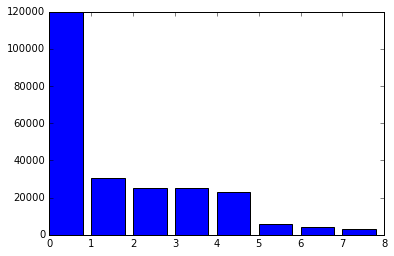

In [5]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

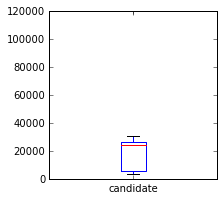

In [6]:
counts.plot(kind="box", figsize=(3,3))

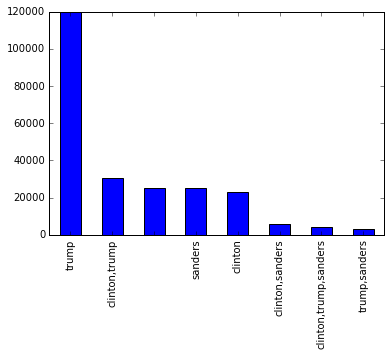

In [7]:
counts.plot(kind="bar",stacked = True)

In [8]:
print(counts)

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


Find the twitter acc age of the user using histogram

In [9]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)

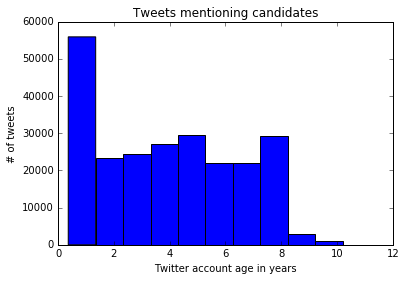

In [10]:
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

Age of all tweeters by candidate

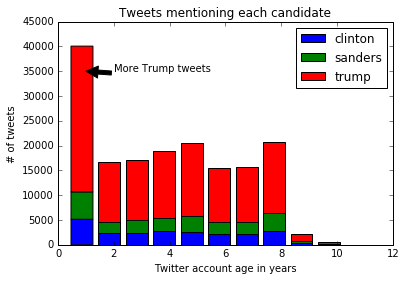

In [12]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]

plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(1, 35000), xytext=(2, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

Twitter background colors of users tweeting about Trump

In [13]:
import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

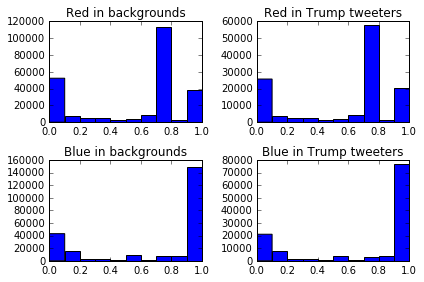

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

ax0.hist(tweets["red"])
ax0.set_title('Red in backgrounds')

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title('Blue in backgrounds')

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title('Blue in Trump tweeters')

plt.tight_layout()
plt.show()

In [15]:
tweets["user_bg_color"].value_counts()

C0DEED    108977
000000     31119
F5F8FA     25597
131516      7731
1A1B1F      5059
022330      4300
0099B9      3958
642D8B      3767
FFFFFF      3101
9AE4E8      2651
ACDED6      2383
352726      2338
C6E2EE      1978
709397      1518
EBEBEB      1475
FF6699      1370
BADFCD      1336
FFF04D      1300
EDECE9      1225
B2DFDA      1218
DBE9ED      1113
ABB8C2      1101
8B542B      1073
3B94D9       623
89C9FA       414
DD2E44       351
94D487       318
4A913C       300
9266CC       287
F5ABB5       267
           ...  
92B1E0         1
EDE6ED         1
66D4FF         1
B5562D         1
E69AA4         1
12941B         1
CC4AE6         1
D9CEB2         1
6D93BD         1
F0EBF0         1
312040         1
949194         1
FDAE35         1
853078         1
661A66         1
95949A         1
B2D5EE         1
191A1C         1
F5F0F2         1
4DB6D6         1
D44C83         1
0A0612         1
0A2A3F         1
00BFFF         1
490E16         1
C4EBC1         1
E1E0B7         1
C4FA00        

Find the most common colors in background

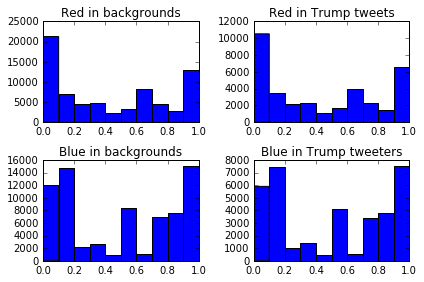

In [16]:
tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

Standard deviation of tweet sentiment

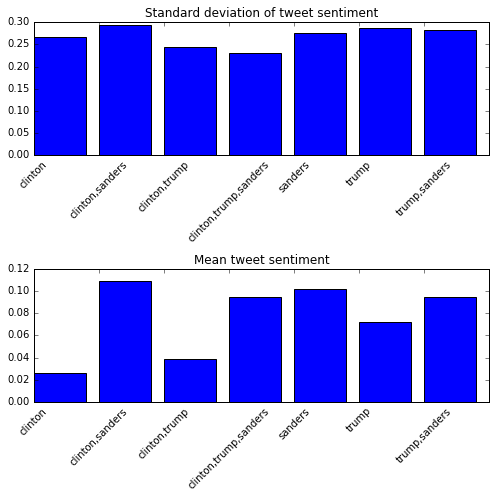

In [17]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

Plot tweet length by candidate

In [18]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

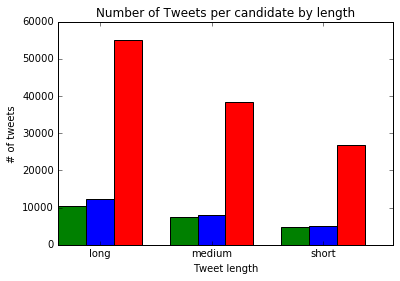

In [19]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()